<a href="https://colab.research.google.com/github/debi201326/AAI_Practical/blob/main/AAI_prac_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Practical No. 5: Implement Q-Learning algorithm to solve simple problem (Grid Navigation).

Shortest Path (Start → Goal):
Step 1: Move → to (4, 0)
Step 2: Move ↑ to (4, 1)
Step 3: Move → to (3, 1)
Step 4: Move → to (3, 2)
Step 5: Move ↑ to (3, 3)
Step 6: Move ↑ to (2, 3)
Step 7: Move → to (1, 3)


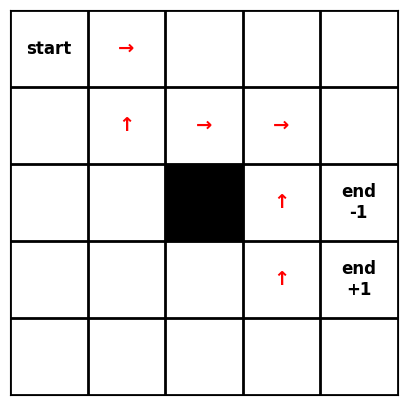

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define grid size (5x5)
GRID_SIZE = 5
ACTIONS = ['left', 'right', 'up', 'down']
ACTION_DICT = {'left': 0, 'right': 1, 'up': 2, 'down': 3}
ACTION_SYMBOLS = {'left': '←', 'right': '→', 'up': '↑', 'down': '↓'}

# Rewards
REWARD_POSITIVE = 1  # +1 goal
REWARD_NEGATIVE = -1  # -1 goal
REWARD_OBSTACLE = -10  # Black obstacle
REWARD_MOVE = -0.1  # Small penalty per move

# Define positions
start_pos = (4, 0)  # Bottom-left (Start)
goal_positive = (1, 4)  # Top-right (End +1)
goal_negative = (2, 4)  # Below top-right (End -1)
obstacle = (2, 2)  # Center (Black Block)

# Initialize grid and Q-table
grid = np.zeros((GRID_SIZE, GRID_SIZE))
grid[goal_positive] = 1  # Mark End +1
grid[goal_negative] = -1  # Mark End -1
grid[obstacle] = -2  # Mark obstacle

Q_table = np.zeros((GRID_SIZE, GRID_SIZE, len(ACTIONS)))

# Q-Learning Hyperparameters
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 0.3  # Exploration rate
episodes = 1000  # More training

# Function to move in the grid
def get_next_position(state, action):
    x, y = state
    if action == 'left':
        y = max(y - 1, 0)
    elif action == 'right':
        y = min(y + 1, GRID_SIZE - 1)
    elif action == 'up':
        x = max(x - 1, 0)
    elif action == 'down':
        x = min(x + 1, GRID_SIZE - 1)
    return (x, y)

# Q-Learning Algorithm
for episode in range(episodes):
    state = start_pos
    while state not in [goal_positive, goal_negative]:
        if np.random.rand() < epsilon:
            action = np.random.choice(ACTIONS)  # Explore
        else:
            action = ACTIONS[np.argmax(Q_table[state])]  # Exploit

        next_state = get_next_position(state, action)

        # Get rewards
        if next_state == goal_positive:
            reward = REWARD_POSITIVE
        elif next_state == goal_negative:
            reward = REWARD_NEGATIVE
        elif next_state == obstacle:
            reward = REWARD_OBSTACLE
        else:
            reward = REWARD_MOVE

        # Update Q-table
        Q_table[state][ACTION_DICT[action]] += alpha * (
            reward + gamma * np.max(Q_table[next_state]) - Q_table[state][ACTION_DICT[action]]
        )

        # Move to next state
        state = next_state

# Find best path
state = start_pos
path = [state]
path_directions = []

while state not in [goal_positive, goal_negative]:
    action = ACTIONS[np.argmax(Q_table[state])]
    path_directions.append(ACTION_SYMBOLS[action])
    state = get_next_position(state, action)
    if state in path:  # Prevent infinite loops
        break
    path.append(state)

# Print the shortest path
print("Shortest Path (Start → Goal):")
for i, (pos, direction) in enumerate(zip(path, path_directions)):
    print(f"Step {i+1}: Move {direction} to {pos}")

# Grid Visualization (Matching Your Image + Shortest Path)
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_xticks(np.arange(GRID_SIZE+1)-0.5, minor=True)
ax.set_yticks(np.arange(GRID_SIZE+1)-0.5, minor=True)
ax.grid(which="minor", color="black", linestyle='-', linewidth=2)
ax.tick_params(which="both", bottom=False, left=False, labelbottom=False, labelleft=False)

# Plot elements
for i in range(GRID_SIZE):
    for j in range(GRID_SIZE):
        if (i, j) == start_pos:
            ax.text(j, i, "start", fontsize=12, ha='center', va='center', fontweight='bold')
        elif (i, j) == goal_positive:
            ax.text(j, i, "end\n+1", fontsize=12, ha='center', va='center', fontweight='bold')
        elif (i, j) == goal_negative:
            ax.text(j, i, "end\n-1", fontsize=12, ha='center', va='center', fontweight='bold')
        elif (i, j) == obstacle:
            ax.add_patch(plt.Rectangle((j-0.5, i-0.5), 1, 1, color='black'))
        elif (i, j) in path:
            direction = path_directions[path.index((i, j)) - 1] if path.index((i, j)) > 0 else "S"
            ax.text(j, i, direction, fontsize=14, ha='center', va='center', fontweight='bold', color='red')

plt.show()